# Maier dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
graph = Graph_MCMC()
graph.read_from_ns("facebook_friends")
graph.convert_props_to_flags()
graph.add_ego_node()


In [4]:
graph.filter_out_low_degree(min_degree=2)

In [5]:
graph.print_info()

Graph with N=349 nodes, E=2336 edges and D=32 vertex features for training


In [6]:
vertices = graph.get_vertex_list()
degrees = graph.G.get_total_degrees(vertices)
print("Min degree: " + str(min(degrees)))

Min degree: 2


In [7]:
graph.partition(B_min=10, B_max=10)

Performing inference...
Current bracket: (10, 10, 10) (5389.873962009406, 5389.873962009406, 5389.873962009406)
Current bracket: (10, 10, 10) (5389.873962009406, 5389.873962009406, 5389.873962009406)
Bisect at B = 10 with S = 5389.873962009406
Best result: B = 10, S = 5389.873962009406
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f956f08e3a0, at 0x7f956c8ff5e0>

Drawing block adjacency matrix $e_{rs}$


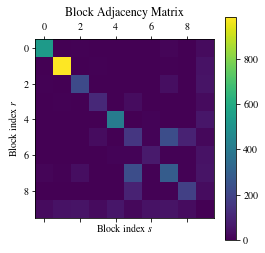

In [8]:
graph.plot_matrix()

In [9]:
graph.mcmc(num_iter=1000, verbose=False)

100%|██████████| 1000/1000 [00:01<00:00, 630.74it/s]


15.415345787394603

Drawing soft partition


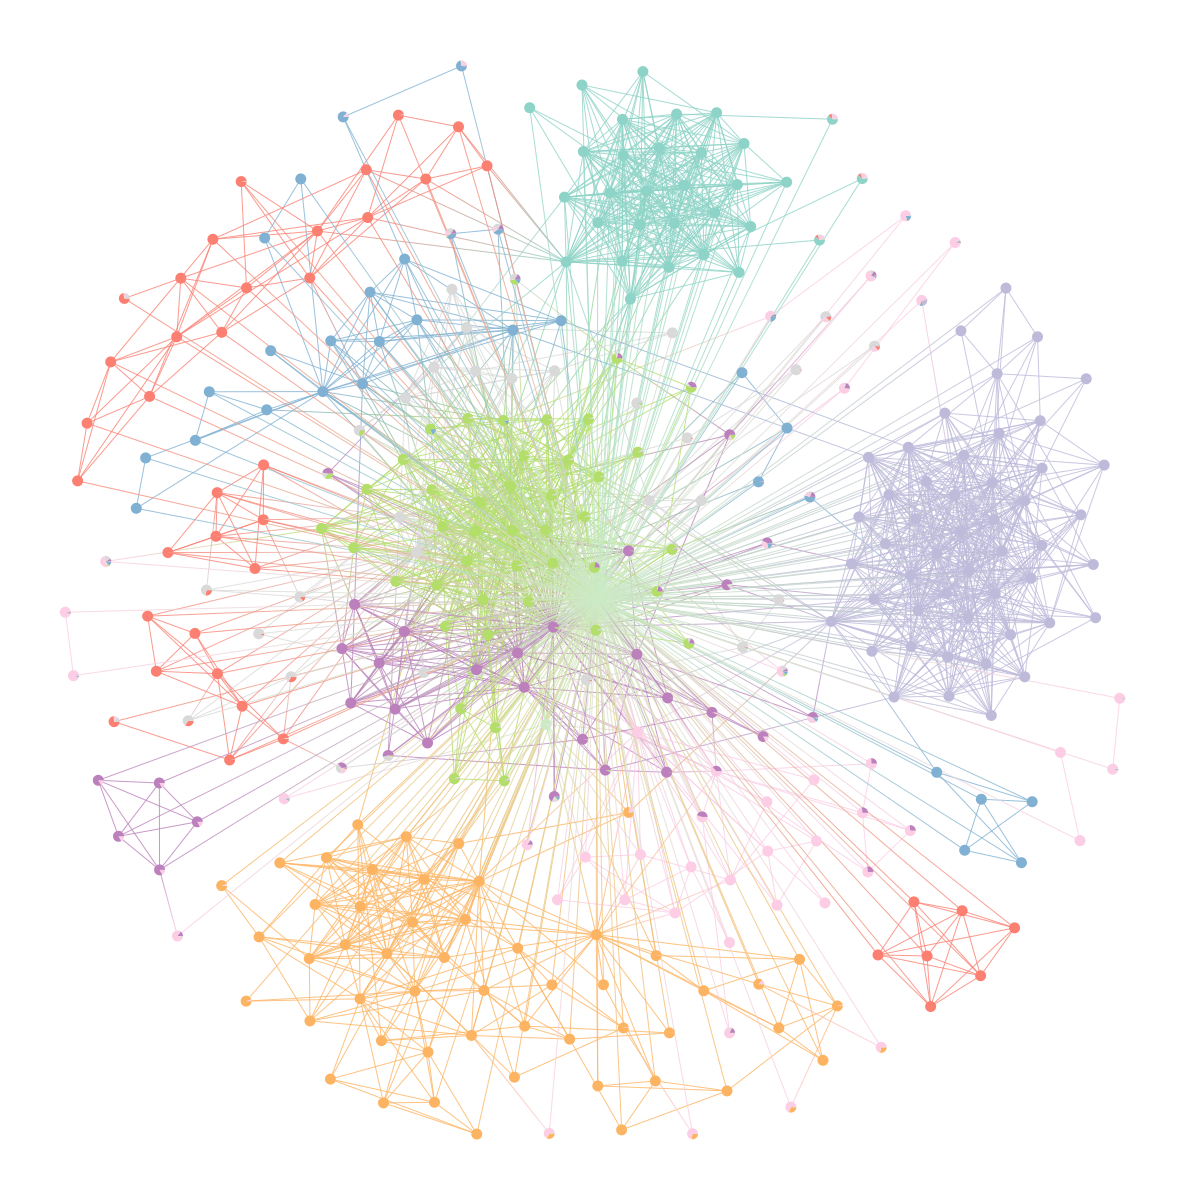

In [10]:
graph.draw(gen_layout=True)

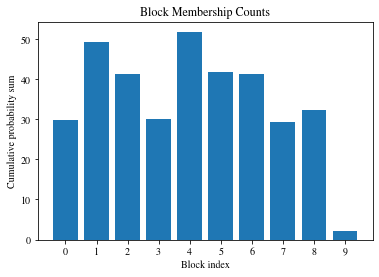

In [11]:
graph.plot_posterior_props()

## Train classifier

In [12]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:14<00:00, 675.56it/s]Sample accept ratio: 86.05000000000001%
Train. set accuracy: 51.57593123209169%



## Interpret results

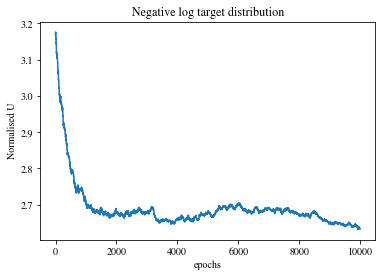

2.690343239189035

In [13]:
classifier.plot_U()

In [14]:
classifier.thin_samples()

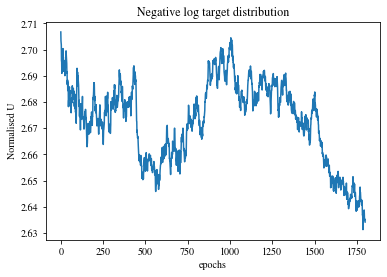

2.6728157888959645

In [15]:
classifier.plot_U()

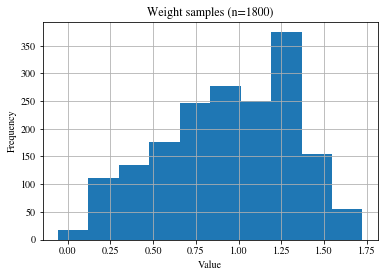

In [16]:
classifier.plot_sample_histogram()

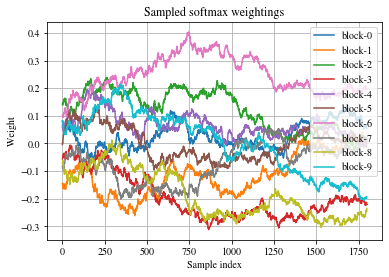

In [17]:
classifier.plot_sample_history()

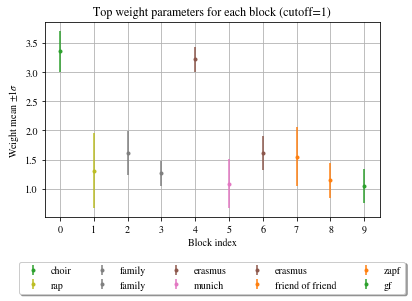

In [18]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

Discarding feature 0: awkward connections
Discarding feature 1: barcelona
Discarding feature 3: climbing
Discarding feature 4: dortmund
Discarding feature 6: exgf
Discarding feature 8: family friend
Discarding feature 9: french class
Discarding feature 10: friend of exgf
Discarding feature 12: gf
Discarding feature 13: hong kong
Discarding feature 15: mentoring
Discarding feature 17: physics conference
Discarding feature 18: quitte
Discarding feature 19: random
Discarding feature 20: reddit
Discarding feature 21: school
Discarding feature 22: studienstiftung
Discarding feature 23: uni
Discarding feature 24: xrays
Discarding feature 25: acquaintance
Discarding feature 26: friend
Discarding feature 27: grad school
Discarding feature 28: rap
Discarding feature 29: sailing
Discarding feature 30: supervisor
Discarding feature 31: zapf


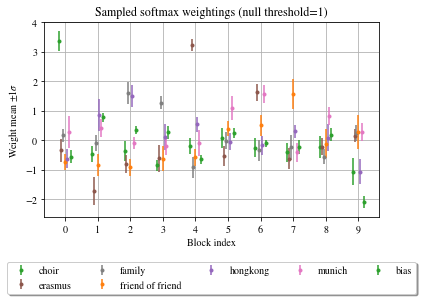

In [19]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=1, legend=True)